# Clustering

A cluster is a subset of data which are similar. Clustering (also called **unsupervised learning**) is the process of dividing a dataset into groups such that the members of each group are as similar (close) as possible to one another, and different groups are as dissimilar (far) as possible from one another. 

Clustering can uncover **previously undetected relationships** in a dataset. There are many applications for cluster analysis. For example, in business, cluster analysis can be used to discover and characterize customer segments for marketing purposes and in biology, it can be used for classification of plants and animals given their features. 

### Clustering Methods :


1. Density-Based Methods :
    - These methods consider the clusters as the dense region having some similarity and different from the lower dense region of the space. These methods have good accuracy and ability to merge two clusters.
    - Example DBSCAN (Density-Based Spatial Clustering of Applications with Noise) , OPTICS (Ordering Points to Identify Clustering Structure) etc.

2. Hierarchical Based Methods :
    - The clusters formed in this method forms a tree type structure based on the hierarchy. New clusters are formed using the previously formed one. It is divided into two category
            -> Agglomerative (bottom up approach)
            -> Divisive (top down approach)
    - Examples CURE (Clustering Using Representatives), BIRCH (Balanced Iterative Reducing Clustering and using Hierarchies) etc.

3. Partitioning Methods :
    - These methods partition the objects into k clusters and each partition forms one cluster. This method is used to optimize an objective criterion similarity function such as when the distance is a major parameter.
    - Example: K-means, CLARANS (Clustering Large Applications based upon randomized Search) etc.

4. Grid-based Methods :
    - In this method the data space are formulated into a finite number of cells that form a grid-like structure. All the clustering operation done on these grids are fast and independent of the number of data objects 
    - Example STING (Statistical Information Grid), wave cluster, CLIQUE (CLustering In Quest) etc.

A good clustering method requirements are:		
- The ability to discover some or all of the hidden clusters.
- Within-cluster similarity and between-cluster dissimilarity.
- Ability to deal with various types of attributes.
- Can deal with noise and outliers.
- Can handle high dimensionality.
- Scalable, Interpretable and usable.

An important issue in clustering is how to determine the similarity between two objects, so that clusters can be formed from objects with high similarity within clusters and low similarity between clusters. Commonly, to measure similarity or dissimilarity between objects, a distance measure such as Euclidean, Manhattan and Minkowski is used. A distance function returns a lower value for pairs of objects that are more similar to one another.

<img src="files/Clustering_distance.png">

### K-mean clustering and python implenmentation

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.

### Algorithm		
1. Clusters the data into k groups where k  is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

In [1]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the train and test datasets to create two DataFrames

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [3]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [4]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

In [5]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


It is very important to note that not all machine learning algorithms support missing values in the data that you are feeding to them. K-Means being one of them. So we need to handle the missing values present in the data. Let's first see where are the values missing:

In [7]:
# For the train set
train.isna().head()

# For the test set
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [8]:
# Let's get the total number of missing values in both datasets.
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


So, you can see in the training set, in the columns Age, Cabin and Embarked, there are missing values and in the test set, the Age and Cabin columns contain missing values.

There are a couple of ways to handle missing values:

- Remove rows with missing values
- Impute missing values

I prefer the latter one because if you remove the rows with missing values it can cause insufficiency in the data which in turn results in inefficient training of the machine learning model.

Now, there are several ways you can perform the imputation:

1. A constant value that has meaning within the domain, such as 0, distinct from all other values.
2. A value from another randomly selected record.
3. A mean, median or mode value for the column.
4. A value estimated by another machine learning model.

Any imputation performed on the train set will have to be performed on test data in the future when predictions are needed from the final machine learning model. This needs to be taken into consideration when choosing how to impute the missing values.

Pandas provides the fillna() function for replacing missing values with a specific value. Let's apply that with Mean Imputation.


In [12]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)

# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

print(train.isna().sum())
print('\n')
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Yes, you can see there are still some missing values in the Cabin and Embarked columns. This is because these values are non-numeric. In order to perform the imputation the values need to be in numeric form. There are ways to convert a non-numeric value to a numeric one. More on this later.

Let's do some more analytics in order to understand the data better. Understanding is really required in order to perform any Machine Learning task. Let's start with finding out which features are categorical and which are numerical.

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
Continuous: Age, Fare. Discrete: SibSp, Parch.
Two features are left out which are not listed above in any of the categories. Yes, you guessed it right, Ticket and Cabin. Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

#### EDA

In [13]:
# Survival count with respect to Pclass:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
# Survival count with respect to Sex:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# Survival count with respect to SibSp:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


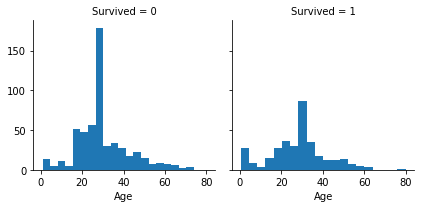

In [16]:
# "Age vs. Survived":
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

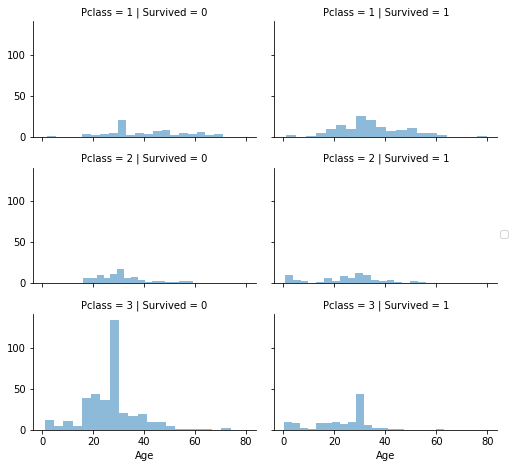

In [17]:
# see how the Pclass and Survived features are related to eachother with a graph:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Data preprocessing
You can see that not all the feature values are of same type. Some of them are numerical and some of them are not. In order to ease the computation, you will feed all numerical data to the model. Let's see the data types of different features that you have:

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Before converting them into numeric ones, you might want to do some feature engineering, i.e. features like Name, Ticket, Cabin and Embarked do not have any impact on the survival status of the passengers. Often, it is better to train your model with only significant features than to train it with all the features, including unnecessary ones. It not only helps in efficient modelling, but also the training of the model can happen in much lesser time. Although, feature engineering is a whole field of study itself, I will encourage you to dig it further. But for this tutorial, know that the features Name, Ticket, Cabin and Embarked can be dropped and they will not have significant impact on the training of the K-Means model.



In [19]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

Now that the dropping part is done let's convert the 'Sex' feature to a numerical one (only 'Sex' is remaining now which is a non-numeric feature). You will do this using a technique called Label Encoding.

In [20]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [21]:
# Let's investigate if you have non-numeric data left

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [27]:
X = np.array(train.drop(['Survived'], 1).astype(float))

y = np.array(train['Survived'])

You have not scaled the values of the different features that you are feeding to the model. The features in the dataset contain different ranges of values. So, what happens is a small change in a feature does not affect the other feature. So, it is also important to scale the values of the features to a same range.

Let's do that now and for this experiment you are going to take 0 - 1 as the uniform value range across all the features.

In [28]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [29]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


Disadvantages of K-Means
Now that you have a fairly good idea on how K-Means algorithm works let's discuss some its disadvantages.

The biggest disadvantage is that K-Means requires you to pre-specify the number of clusters (k). However, for the Titanic dataset, you had some domain knowledge available that told you the number of people who survived in the shipwreck. This might not always be the case with real world datasets. Hierarchical clustering is an alternative approach that does not require a particular choice of clusters. An additional disadvantage of k-means is that it is sensitive to outliers and different results can occur if you change the ordering of the data.

K-Means is a lazy learner where generalization of the training data is delayed until a query is made to the system. This means K-Means starts working only when you trigger it to, thus lazy learning methods can construct a different approximation or result to the target function for each encountered query. It is a good method for online learning, but it requires a possibly large amount of memory to store the data, and each request involves starting the identification of a local model from scratch.

- Pros
    - Finds cluster centers that minimize condiHonal variance (good representaHon of data)
    - Simple and fast*
    - Easy to implement 
- Cons
    - Need to choose K
    - SensiHve to outliers
    - Prone to local minima
    - All clusters have the same parameters (e.g., distance measure is non- adapHve)
    - *Can be slow: each iteraHon is O(KNd) for N d-dimensional points

## Mean-shift Clustering

Meanshift is a clustering algorithm that assigns the datapoints to the clusters iteratively by shifting points towards the mode. The mode can be understood as the highest density of datapoints (in the region, in the context of the Meanshift). As such, it is also known as the mode-seeking algorithm. Meanshift algorithm has applications in the field of image processing and computer vision.

Given a set of datapoints, the algorithm iteratively assign each datapoint towards the closest cluster centroid. The direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.

Unlike the popular K-Means algorithm, meanshift does not require specifying the number of clusters in advance. The number of clusters is determined by the algorithm with respect to the data.



#### Algorithm

You will need a few things before you start to run Meanshift on a set of datapoints X:

- A function N(x) to determine what are the neighbours of a point x ∈ X. The neighbouring points are the points within a certain distance. **The distance metric is usually Euclidean Distance.**
- A kernel K(d) to use in Meanshift. **K is usually a Gaussian Kernel, and d is the distance between two datapoints.**

Now, with the above, this is the Meanshift algorithm for a set of datapoints X:

1. **For each datapoint x ∈ X, find the neighbouring points N(x) of x.**
2. **For each datapoint x ∈ X, calculate the mean shift m(x) from this equation: **
<img src="files/meanshift1.png">
3. **For each datapoint x ∈ X, update x ← m(x).**
4. **Repeat 1. for n_iteations or until the points are almost not moving or not moving.**

The most important piece is calculating the mean shift m(x). The formula in step 2. looks daunting but let’s break it down. Notice the red red encircled parts are essentially the same. Let’s replace that with Wi, so the formula becomes this:

<img src="files/meanshift2.png">

Essentially, the meanshift is just **calculating the weighted average of the affected points w.r.t. to x.** From this perspective, the formula is less mystifying.

To summarize: The algorithm finds a set of nearby points that affect a datapoint, then shift it towards where most of the points are, and the closest points have more influence than the further points. Repeat this for all datapoints until nothing changes.

In [31]:
# Define the kernel, euclidean distance, neighbourhood functions we need first:
def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

In [33]:
# Next, we will implement Meanshift by translating the algorithm as described above.
X = np.copy(original_X)

past_X = []
n_iterations = 5
for it in range(n_iterations):
    for i, x in enumerate(X):
        ### Step 1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.
        neighbours = neighbourhood_points(X, x, look_distance)
        
        ### Step 2. For each datapoint x ∈ X, calculate the mean shift m(x).
        numerator = 0
        denominator = 0
        for neighbour in neighbours:
            distance = euclid_distance(neighbour, x)
            weight = gaussian_kernel(distance, kernel_bandwidth)
            numerator += (weight * neighbour)
            denominator += weight
        
        new_x = numerator / denominator
        
        ### Step 3. For each datapoint x ∈ X, update x ← m(x).
        X[i] = new_x
    
    past_X.append(np.copy(X))

NameError: name 'original_X' is not defined

K-Means VS Meanshift
Meanshift looks very similar to K-Means, they both move the point closer to the cluster centroids. One may wonder: How is this different from K-Means? K-Means is faster in terms of runtime complexity!

The key difference is that **Meanshift does not require the user to specify the number of clusters.** In some cases, it is not straightforward to guess the right number of clusters to use. In K-Means, the output may end up having too few clusters or too many clusters to be useful. At the cost of larger time complexity, Meanshift determines the number of clusters suitable to the dataset provided.

Another commonly cited difference is that K-Means can only learn circle or ellipsoidal clusters. However, this is **not true.** The reason that Meanshift can learn arbitrary shapes is because **the features are mapped to another higher dimensional feature space through the kernel.** The arbitrary shapes are due to the algorithm finding circle or ellipsoidal clusters in higher dimensional feature space. When the features are mapped back to 1D/2D/3D, the resulting clusters look like strange shapes. This is also the trick as used in Support Vector Machines.

A traditional K-means does not use kernels, but Kernel K-means is available. Kernel K-Means is useful if 1) the number of clusters is known or can be reasonably estimated, and 2) dataset needs learning non-ellipsoidal cluster shapes. So, you can enjoy the better runtime complexity of K-Means and learn arbitrary clusters if you can determine the number of clusters to use.